<a href="https://colab.research.google.com/github/hjn14133/Machine-Learning/blob/main/RF_cotton_yield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
df = pd.read_csv('FT_join_JH_cleaned.csv')
df.head(5)

,OID_,FID_1,DISTANCE,SWATHWIDTH,VRYIELDBAL,SECTIONID,Crop,Time,Heading,Variety,Elevation,IsoTime,Machine,FID_2,Time_1,Crop_1,AppliedRat,SWATHWID_1,DISTANCE_1,Heading_1,SECTIONI_1,ControlRat,TargetRate,Variety_1,Elevatio_1,IsoTime_1,Machine_1,Distance_2,FID_12,Module__,Lf,Mic,Str,Rd,b,Tr,Unif,Loan_Rat,Loan_Value
0,NaN,2326,7.726433,17.998688,5.976549,0,175,11/23/2020 5:24:47 PM,179.614345,dp 1646 b2xf,163.744028,2020-11-23T17:24:47.745Z,1,2522,6/4/2020 3:34:49 PM,175,24022.13972,2.999781,6.984466,180.188720,407,24000.17422,23997.85858,dp 1646 b2xf,141.316374,2020-06-04T15:34:49.551Z,1,0.000008,2326,5,3.0,3.95,30.28,80.03,7.60,2.50,80.40,56.34,272.24
1,NaN,2893,7.857666,17.998688,5.961102,0,175,11/23/2020 5:34:33 PM,358.808094,dp 1646 b2xf,165.843765,2020-11-23T17:34:33.738Z,1,5081,6/4/2020 4:01:05 PM,175,26818.51751,2.999781,7.115700,0.331250,408,27200.02360,27198.92201,dp 1646 b2xf,143.104432,2020-06-04T16:01:05.511Z,1,0.000005,2893,6,3.0,3.90,31.60,78.43,8.05,3.00,80.53,56.38,262.97
2,NaN,2900,7.923283,17.998688,5.918805,0,175,11/23/2020 5:34:40 PM,359.703094,dp 1646 b2xf,164.951377,2020-11-23T17:34:40.735Z,1,5097,6/4/2020 4:01:13 PM,175,25814.89712,2.999781,7.115700,0.201250,408,27200.02360,27198.92201,dp 1646 b2xf,142.274379,2020-06-04T16:01:13.508Z,1,0.000002,2900,6,3.0,3.90,31.60,78.43,8.05,3.00,80.53,56.38,262.97
3,NaN,12062,0.919535,17.998688,5.909818,0,175,11/23/2020 9:12:42 PM,357.597782,dp 1646 b2xf,162.887088,2020-11-23T21:12:42.804Z,1,14283,6/4/2020 7:09:20 PM,175,18987.85033,2.999781,4.657080,0.417187,408,0.00000,34997.21434,dg3799 b3xf,140.200760,2020-06-04T19:09:20.569Z,1,0.000005,12062,24,3.0,4.28,30.83,78.90,7.80,3.25,80.28,55.90,276.38
4,NaN,2330,7.759241,17.998688,5.848390,0,175,11/23/2020 5:24:51 PM,179.574344,dp 1646 b2xf,164.042584,2020-11-23T17:24:51.747Z,1,2532,6/4/2020 3:34:54 PM,175,23467.72039,2.999781,7.082892,180.068720,407,24000.17422,23997.85858,dp 1646 b2xf,141.778972,2020-06-04T15:34:54.557Z,1,0.000006,2330,5,3.0,3.95,30.28,80.03,7.60,2.50,80.40,56.34,272.24


In [7]:
# Load data set
X = df[['DISTANCE', 'Heading','Elevation', 'AppliedRat']]
y1 = df['VRYIELDBAL']
y2 = df['Loan_Value']

print('The shape of our features is:', X.shape)

The shape of our features is: (12695, 4)


In [5]:
# Descriptive statistics for each column
X.describe()

,DISTANCE,Heading,Elevation,AppliedRat
count,12695.000000,12695.000000,12695.000000,12695.000000
mean,7.771627,142.518911,165.487678,26262.416660
std,0.497228,121.577647,1.831247,4487.031551
min,0.066516,-0.004375,160.791272,0.000000
25%,7.776091,0.823281,164.157093,22795.942230
50%,7.824858,179.987782,165.552706,25596.366870
75%,7.857666,180.724828,166.855123,30788.483660
max,15.533150,359.996219,169.586704,76489.633240


In [8]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_x, test_x, train_y1, test_y1 = train_test_split(X, y1, test_size = 0.25,
                                                      random_state = 42)

In [9]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_x, train_y1);

In [10]:
import numpy as np
# Use the forest's predict method on the test data
predictions = rf.predict(test_x)
# Calculate the absolute errors
errors = abs(predictions - test_y1)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

Mean Absolute Error: 0.37 .


In [11]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_y1)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 71.3 %.


In [13]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
feature_list = list(X.columns)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: DISTANCE             Importance: 0.55
Variable: Elevation            Importance: 0.21
Variable: AppliedRat           Importance: 0.12
Variable: Heading              Importance: 0.11


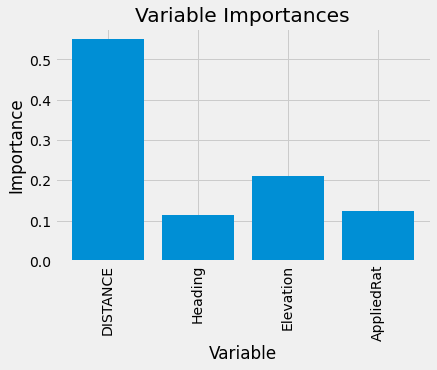

In [14]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');